<div style="border:solid green 2px; padding: 20px">
    
<b>Hello, Collin!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1. I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__

An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). It would be good to add the progress and purpose of the study.

## Initialization

In [1]:
# Loading all the libraries
from scipy import stats as st
import pandas as pd
import numpy as np

## Load data

In [2]:
# Load the data files into different DataFrames

calls = pd.read_csv("/datasets/megaline_calls.csv")

internet = pd.read_csv('/datasets/megaline_internet.csv')

messages = pd.read_csv('/datasets/megaline_messages.csv')

plans = pd.read_csv('/datasets/megaline_plans.csv')

users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [5]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [6]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


## Plans

In [8]:
# Print the general/summary information about the plans' DataFrame

plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [9]:
# Print a sample of data for plans

print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


<!--  -->At first glance, the "Ultimate" plan is a better deal because of the lower cost per GB of data, message, and minute of phone call. 

## Fix data

[Fix obvious issues with the data given the initial observations.]

**No obvious issues detected**

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [10]:
duplicates_rows = plans[plans.duplicated()]
print(duplicates_rows)

Empty DataFrame
Columns: [messages_included, mb_per_month_included, minutes_included, usd_monthly_pay, usd_per_gb, usd_per_message, usd_per_minute, plan_name]
Index: []


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__


Great. First look at the data is done

## Users

In [11]:
# Print the general/summary information about the users' DataFrame

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
# Print a sample of data for users

users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
304,1304,Dominque,Cole,69,"Birmingham-Hoover, AL MSA",2018-10-28,ultimate,NaN
279,1279,Neal,Duke,27,"Baton Rouge, LA MSA",2018-02-05,ultimate,NaN
195,1195,Roy,Velez,60,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-06-09,surf,NaN
51,1051,Rosario,Gibbs,55,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-12-11,surf,NaN
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

<!--   --> Upon investigation, the columns with dates can be converted into datetime format. All other data types are sufficient for what they represent. 

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [13]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
users.info()
users.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
207,1207,Samuel,Porter,63,"Omaha-Council Bluffs, NE-IA MSA",2018-12-22,surf,NaT
410,1410,Wendell,Lloyd,46,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-06,surf,NaT
28,1028,Jefferey,Rasmussen,57,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-02-21,ultimate,NaT
197,1197,Lon,Parker,56,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-05,surf,NaT
174,1174,Larisa,Ellis,67,"Cleveland-Elyria, OH MSA",2018-01-28,surf,NaT


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [14]:
duplicates_rows = users[users.duplicated()]
print(duplicates_rows)

Empty DataFrame
Columns: [user_id, first_name, last_name, age, city, reg_date, plan, churn_date]
Index: []


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

No checking for duplicates of each dataset. Please add

<div class="alert alert-info"> <b>all fixed :)

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Duplicate checking is the basis of data preprocessing

## Calls

In [15]:
# Print the general/summary information about the calls' DataFrame

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [16]:
# Print a sample of data for calls

calls.sample(5)

,id,user_id,call_date,duration
72434,1257_174,1257,2018-12-12,20.57
36256,1138_210,1138,2018-07-28,9.43
122245,1432_95,1432,2018-12-14,3.79
20003,1076_516,1076,2018-11-03,0.00
120593,1420_163,1420,2018-12-01,2.29


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

<!--  -->Again we can convert 'call_date' to DateTime

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [17]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [18]:
calls['duration'] = np.ceil(calls['duration'])

print(calls.sample(5))

               id  user_id  call_date  duration
101453   1362_198     1362 2018-12-28       0.0
93929    1335_159     1335 2018-07-13       0.0
56187    1201_287     1201 2018-11-10       4.0
34223   1126_1283     1126 2018-07-02       5.0
89497    1326_148     1326 2018-09-23       7.0


In [19]:
duplicates_rows = calls[calls.duplicated()]
print(duplicates_rows)

Empty DataFrame
Columns: [id, user_id, call_date, duration]
Index: []


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

At the end of each call, the duration of the call is rounded up. The `np.ceil()` method should be used.

<div class="alert alert-info"> <b>all fixed :)

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Good for you for using the np.ceil() method
    

## Messages

In [20]:
# Print the general/summary information about the messages' DataFrame

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [21]:
# Print a sample of data for messages

messages.sample(5)

,id,user_id,message_date
74702,1483_29,1483,2018-07-12
7915,1060_251,1060,2018-11-25
8795,1065_66,1065,2018-10-13
36483,1242_155,1242,2018-10-18
53867,1341_143,1341,2018-11-14


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

<!--  -->Again we can convert 'message_date' to DateTime

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [22]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [23]:
duplicates_rows = messages[messages.duplicated()]
print(duplicates_rows)

Empty DataFrame
Columns: [id, user_id, message_date]
Index: []


## Internet

In [24]:
# Print the general/summary information about the internet DataFrame

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [25]:
# Print a sample of data for the internet traffic

internet.sample(5)

,id,user_id,session_date,mb_used
71265,1332_238,1332,2018-08-26,133.24
30768,1141_35,1141,2018-11-24,483.69
39725,1179_56,1179,2018-10-22,0.00
56473,1255_187,1255,2018-08-08,663.40
72382,1336_440,1336,2018-08-12,457.49


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

<!--  -->Again we can convert 'session_date' to DateTime

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [26]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [27]:
duplicates_rows = internet[internet.duplicated()]
print(duplicates_rows)

Empty DataFrame
Columns: [id, user_id, session_date, mb_used]
Index: []


In [28]:
internet['gb_used'] = np.ceil(internet['mb_used'] / 1024)

print(internet.head())

         id  user_id session_date  mb_used  gb_used
0   1000_13     1000   2018-12-29    89.86      1.0
1  1000_204     1000   2018-12-31     0.00      0.0
2  1000_379     1000   2018-12-28   660.40      1.0
3  1000_413     1000   2018-12-26   270.99      1.0
4  1000_442     1000   2018-12-27   880.22      1.0


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__


At the end of each month, megabytes are converted to gigabytes and rounded up. Can you please fix this?

<div class="alert alert-info"> <b>all fixed :)

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

well done =)

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [29]:
# Print out the plan conditions and make sure they are clear for you

print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__

In the only or last line of the Jupiter code cell, the print() method need not be written, unlike the simulator

## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [30]:
# Calculate the number of calls made by each user per month. Save the result.
calls['call_date'] = pd.to_datetime(calls['call_date'])

# Step 2: Create a new column for the month (year + month for uniqueness)
calls['month'] = calls['call_date'].dt.to_period('M')

# Step 3: Group by 'user_id' and 'month' and count
monthly_calls = calls.groupby(['user_id', 'month']).size().reset_index(name='call_count')

monthly_calls_pivot = monthly_calls.pivot(index='user_id', columns='month', values='call_count').fillna(0).astype(int)

print(monthly_calls_pivot)

month    2018-01  2018-02  2018-03  2018-04  2018-05  2018-06  2018-07  \
user_id                                                                  
1000           0        0        0        0        0        0        0   
1001           0        0        0        0        0        0        0   
1002           0        0        0        0        0        0        0   
1003           0        0        0        0        0        0        0   
1004           0        0        0        0       21       44       49   
...          ...      ...      ...      ...      ...      ...      ...   
1495           0        0        0        0        0        0        0   
1496           0        0        0        0        0        0        0   
1497           0        0        0        0        0        0        0   
1498           0       37       37       47       35       37       43   
1499           0        0        0        0        0        0        0   

month    2018-08  2018-09  2018-10  2

In [31]:
# Calculate the amount of minutes spent by each user per month. Save the result.

monthly_minutes = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='total_minutes')

monthly_minutes_pivot = monthly_minutes.pivot(index='user_id', columns='month', values='total_minutes').fillna(0).astype(float)

print(monthly_minutes_pivot)

month    2018-01  2018-02  2018-03  2018-04  2018-05  2018-06  2018-07  \
user_id                                                                  
1000         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1001         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1002         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1003         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1004         0.0      0.0      0.0      0.0    193.0    275.0    381.0   
...          ...      ...      ...      ...      ...      ...      ...   
1495         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1496         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1497         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1498         0.0    244.0    266.0    365.0    288.0    238.0    321.0   
1499         0.0      0.0      0.0      0.0      0.0      0.0      0.0   

month    2018-08  2018-09  2018-10  2

In [32]:
# Calculate the number of messages sent by each user per month. Save the result.

messages['month'] = messages['message_date'].dt.to_period('M')

monthly_messages = messages.groupby(['user_id', 'month']).size().reset_index(name='message_count')

monthly_messages_pivot = monthly_messages.pivot(index='user_id', columns='month', values='message_count').fillna(0).astype(int)

print(monthly_messages_pivot)

month    2018-01  2018-02  2018-03  2018-04  2018-05  2018-06  2018-07  \
user_id                                                                  
1000           0        0        0        0        0        0        0   
1001           0        0        0        0        0        0        0   
1002           0        0        0        0        0        0        0   
1003           0        0        0        0        0        0        0   
1004           0        0        0        0        7       18       26   
...          ...      ...      ...      ...      ...      ...      ...   
1491           0        0        0        6       45       54       64   
1492           0        0        0        0        0        0        0   
1494           0        0        0        0        0        0       20   
1496           0        0        0        0        0        0        0   
1497           0        0        0        0        0        0        0   

month    2018-08  2018-09  2018-10  2

In [33]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

internet['month'] = internet['session_date'].dt.to_period('M')

monthly_traffic = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='total_mb')

monthly_traffic_pivot = monthly_traffic.pivot(index='user_id', columns='month', values='total_mb').fillna(0).astype(float)

print(monthly_traffic_pivot)

month    2018-01   2018-02   2018-03   2018-04   2018-05   2018-06   2018-07  \
user_id                                                                        
1000         0.0      0.00      0.00      0.00      0.00      0.00      0.00   
1001         0.0      0.00      0.00      0.00      0.00      0.00      0.00   
1002         0.0      0.00      0.00      0.00      0.00      0.00      0.00   
1003         0.0      0.00      0.00      0.00      0.00      0.00      0.00   
1004         0.0      0.00      0.00      0.00   6547.21  20672.82  24516.62   
...          ...       ...       ...       ...       ...       ...       ...   
1495         0.0      0.00      0.00      0.00      0.00      0.00      0.00   
1496         0.0      0.00      0.00      0.00      0.00      0.00      0.00   
1497         0.0      0.00      0.00      0.00      0.00      0.00      0.00   
1498         0.0  19822.04  19744.34  19878.86  22462.17  14807.18  24834.37   
1499         0.0      0.00      0.00    

[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [34]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

per_user_merged = pd.merge(monthly_calls, monthly_minutes, on=['user_id', 'month'])
per_user_merged = pd.merge(per_user_merged, monthly_messages, on=['user_id', 'month'])
per_user_merged = pd.merge(per_user_merged, monthly_traffic, on=['user_id', 'month'])

print(per_user_merged)

      user_id    month  call_count  total_minutes  message_count  total_mb
0        1000  2018-12          16          124.0             11   1901.47
1        1001  2018-08          27          182.0             30   6919.15
2        1001  2018-09          49          315.0             44  13314.82
3        1001  2018-10          65          393.0             53  22330.49
4        1001  2018-11          64          426.0             36  18504.30
...       ...      ...         ...            ...            ...       ...
1754     1496  2018-09          52          414.0             21  16389.27
1755     1496  2018-10          46          317.0             18  14287.36
1756     1496  2018-11          39          308.0             13   8547.36
1757     1496  2018-12          40          294.0             11  16438.99
1758     1497  2018-12          54          300.0             50  11106.55

[1759 rows x 6 columns]


In [35]:
# Add the plan information

users_plan = users[['user_id', 'plan']]

per_user_merged = pd.merge(per_user_merged, users_plan, on='user_id', how='left')

print(per_user_merged.head())

   user_id    month  call_count  total_minutes  message_count  total_mb  \
0     1000  2018-12          16          124.0             11   1901.47   
1     1001  2018-08          27          182.0             30   6919.15   
2     1001  2018-09          49          315.0             44  13314.82   
3     1001  2018-10          65          393.0             53  22330.49   
4     1001  2018-11          64          426.0             36  18504.30   

       plan  
0  ultimate  
1      surf  
2      surf  
3      surf  
4      surf  


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [36]:
# Calculate the monthly revenue for each user

# Merge with plans df
per_user_merged = per_user_merged.merge(plans, left_on='plan', right_on='plan_name', how='left')

# Calculate the Overage
per_user_merged['extra_minutes'] = (per_user_merged['total_minutes'] - per_user_merged['minutes_included']).clip(lower=0)
per_user_merged['extra_messages'] = (per_user_merged['message_count'] - per_user_merged['messages_included']).clip(lower=0)
per_user_merged['extra_mb'] = (per_user_merged['total_mb'] - per_user_merged['mb_per_month_included']).clip(lower=0)

# Calculate the Overage Charges
per_user_merged['minute_charge'] = per_user_merged['extra_minutes'] * per_user_merged['usd_per_minute']
per_user_merged['message_charge'] = per_user_merged['extra_messages'] * per_user_merged['usd_per_message']
per_user_merged['mb_charge'] = per_user_merged['extra_mb'] * (per_user_merged['usd_per_gb'] / 1024)  # Convert per GB to per MB

# Calculate Total Monthly Revenue
per_user_merged['total_revenue'] = per_user_merged['usd_monthly_pay'] + per_user_merged['minute_charge'] + per_user_merged['message_charge'] + per_user_merged['mb_charge']

monthly_revenue = per_user_merged[['user_id', 'month', 'total_revenue']]

print(monthly_revenue)

      user_id    month  total_revenue
0        1000  2018-12      70.000000
1        1001  2018-08      20.000000
2        1001  2018-09      20.000000
3        1001  2018-10      88.161191
4        1001  2018-11      50.706055
...       ...      ...            ...
1754     1496  2018-09      30.051465
1755     1496  2018-10      20.000000
1756     1496  2018-11      20.000000
1757     1496  2018-12      30.537012
1758     1497  2018-12      70.000000

[1759 rows x 3 columns]


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

That's right. There are 1,024 megabytes in one gigabyte.

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

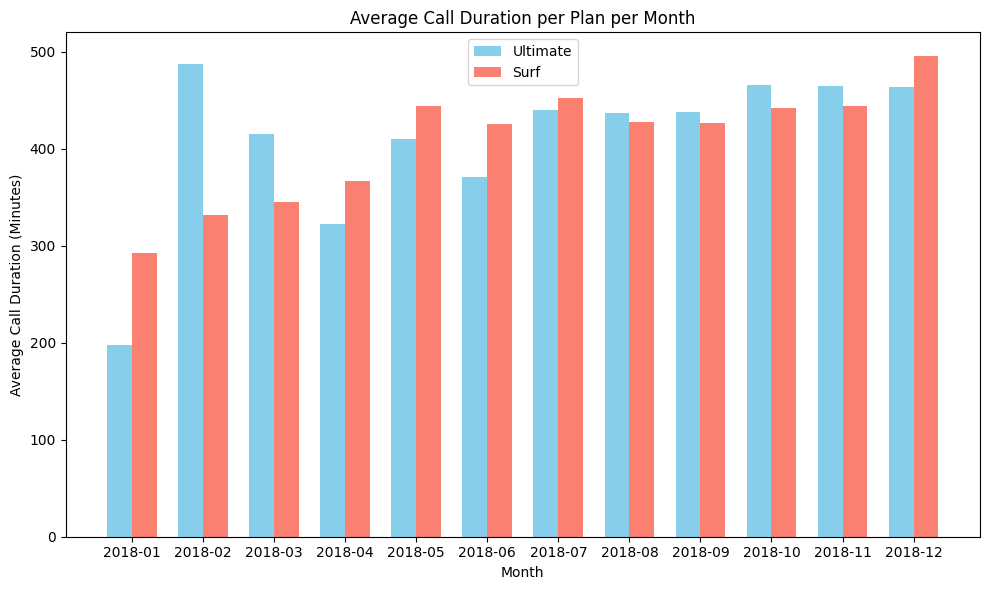

In [37]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plot to visualize it.

from matplotlib import pyplot as plt
import numpy as np

ultimate_minutes = per_user_merged[per_user_merged['plan'] == 'ultimate'][['total_minutes', 'month']]

surf_minutes = per_user_merged[per_user_merged['plan'] == 'surf'][['total_minutes', 'month']]

# Step 1: Group by month and calculate the average call duration
ultimate_avg = ultimate_minutes.groupby('month')['total_minutes'].mean()
surf_avg = surf_minutes.groupby('month')['total_minutes'].mean()

# Step 2: Get all months and align data (in case some months are missing from either plan)
months = sorted(set(ultimate_avg.index).union(set(surf_avg.index)))
ultimate_vals = [ultimate_avg.get(m, 0) for m in months]
surf_vals = [surf_avg.get(m, 0) for m in months]

# Step 3: Create the bar plot
x = np.arange(len(months))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, ultimate_vals, width, label='Ultimate', color='skyblue')
ax.bar(x + width/2, surf_vals, width, label='Surf', color='salmon')

# Step 4: Customize the plot
ax.set_xlabel('Month')
ax.set_ylabel('Average Call Duration (Minutes)')
ax.set_title('Average Call Duration per Plan per Month')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()

plt.tight_layout()
plt.show()

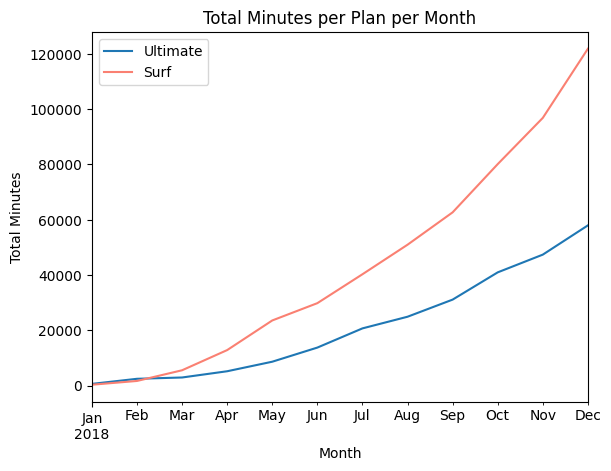

In [38]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

utlimate_total = ultimate_minutes.groupby('month')['total_minutes'].sum()
surf_total = surf_minutes.groupby('month')['total_minutes'].sum()

utlimate_total.plot(xlabel='Month', ylabel='Total Minutes', title='Total Minutes per Plan per Month', legend=True, label='Ultimate')
surf_total.plot(xlabel='Month', ylabel='Total Minutes', title='Total Minutes per Plan per Month', legend=True, label='Surf', color='Salmon')

plt.show()

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [39]:
# Calculate the mean and the variance of the monthly call duration

ultimate_duration_mean = ultimate_minutes['total_minutes'].mean()

surf_duration_mean = surf_minutes['total_minutes'].mean()

ultimate_duration_variance = np.var(ultimate_minutes['total_minutes'])

surf_duration_variance = np.var(surf_minutes['total_minutes'])

print(ultimate_duration_mean)

print(surf_duration_mean)

print(ultimate_duration_variance)

print(surf_duration_variance)

442.51295336787564
445.77542372881356
62180.81978039679
55274.530073972994


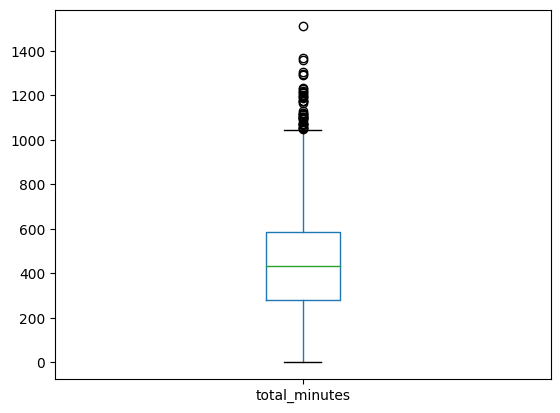

In [40]:
# Plot a boxplot to visualize the distribution of the monthly call duration

per_user_merged['total_minutes'].plot(kind='box')

plt.show()

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

**Conclusion**

Users behave wildly different between the plans and among the users within their plans. Users using "Surf" use much more time on their phones to make calls, as seen in the line graph. This could be because the plans are cheaper and they have fewer messages per month, so they feel the need to call instead of text (even though they have fewer minutes as well). 

Based on the variance between the two plans, the users within the plans themselves also behave wildly differently, with data spread all over the place. You can see the many many outliers within the box plot that support this claim. 

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Great visualization

### Messages

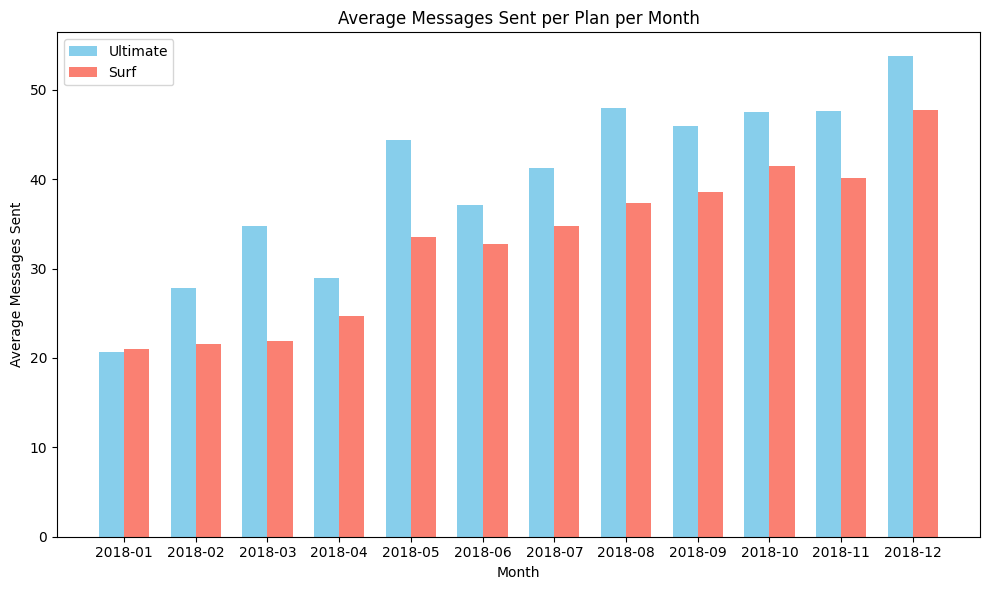

In [41]:
# Compare the number of messages users of each plan tend to send each month

from matplotlib import pyplot as plt
import numpy as np

ultimate_messages = per_user_merged[per_user_merged['plan'] == 'ultimate'][['message_count', 'month']]

surf_messages = per_user_merged[per_user_merged['plan'] == 'surf'][['message_count', 'month']]

# Step 1: Group by month and calculate the average Message Count
ultimate_avg_sms = ultimate_messages.groupby('month')['message_count'].mean()
surf_avg_sms = surf_messages.groupby('month')['message_count'].mean()

# Step 2: Get all months and align data (in case some months are missing from either plan)
months = sorted(set(ultimate_avg_sms.index).union(set(surf_avg_sms.index)))
ultimate_vals_sms = [ultimate_avg_sms.get(m, 0) for m in months]
surf_vals_sms = [surf_avg_sms.get(m, 0) for m in months]

# Step 3: Create the bar plot
x = np.arange(len(months))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, ultimate_vals_sms, width, label='Ultimate', color='skyblue')
ax.bar(x + width/2, surf_vals_sms, width, label='Surf', color='salmon')

# Step 4: Customize the plot
ax.set_xlabel('Month')
ax.set_ylabel('Average Messages Sent')
ax.set_title('Average Messages Sent per Plan per Month')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__

All necessary libraries should be unloaded at the beginning of the project in one code cell

**Conclusion**

Users using the "Ultimate Plan" are sending more messages per month on average than users on the "Surf" plan. Since Ultimate users get more messages per month (1000 vs 50) they are really taking advantage of their plans benefits. 

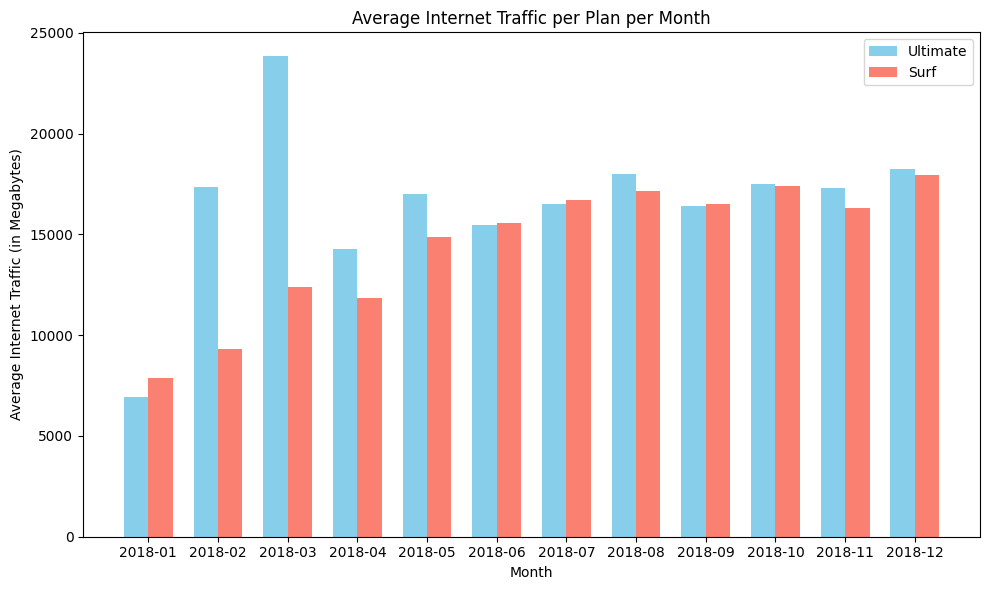

In [42]:
# Compare the amount of internet traffic consumed by users per plan

ultimate_traffic = per_user_merged[per_user_merged['plan'] == 'ultimate'][['total_mb', 'month']]

surf_traffic = per_user_merged[per_user_merged['plan'] == 'surf'][['total_mb', 'month']]

# Step 1: Group by month and calculate the average Internet Usage
ultimate_avg_mb = ultimate_traffic.groupby('month')['total_mb'].mean()
surf_avg_mb = surf_traffic.groupby('month')['total_mb'].mean()

# Step 2: Get all months and align data (in case some months are missing from either plan)
months = sorted(set(ultimate_avg_mb.index).union(set(surf_avg_mb.index)))
ultimate_vals_mb = [ultimate_avg_mb.get(m, 0) for m in months]
surf_vals_mb = [surf_avg_mb.get(m, 0) for m in months]

# Step 3: Create the bar plot
x = np.arange(len(months))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, ultimate_vals_mb, width, label='Ultimate', color='skyblue')
ax.bar(x + width/2, surf_vals_mb, width, label='Surf', color='salmon')

# Step 4: Customize the plot
ax.set_xlabel('Month')
ax.set_ylabel('Average Internet Traffic (in Megabytes)')
ax.set_title('Average Internet Traffic per Plan per Month')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()

plt.tight_layout()
plt.show()

**Conclusion**

Users in both plans tend to stay the same between both plans, with 2 obvious outliers (February and March) where Ultimate users used almost double the amount of Surf users. In this regard, the plans are equal and it is not worth paying the extra $50 dollars a month if all you do with your phone plan is surf the web. 

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

### Internet

**See above**

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

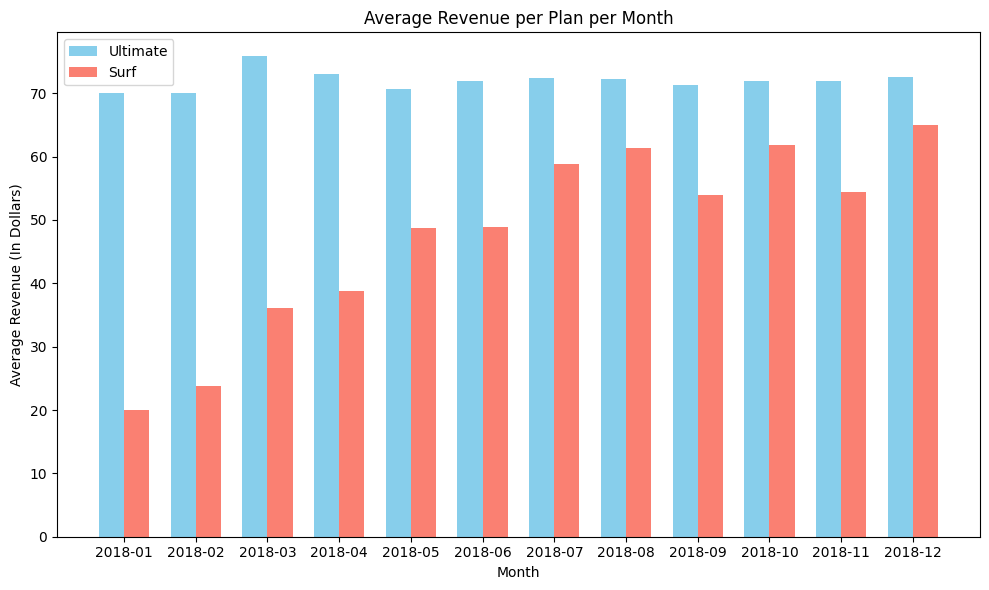

In [43]:
ultimate_rev = per_user_merged[per_user_merged['plan'] == 'ultimate'][['total_revenue', 'month']]

surf_rev = per_user_merged[per_user_merged['plan'] == 'surf'][['total_revenue', 'month']]

# Step 1: Group by month and calculate the average Message Count
ultimate_avg_rev = ultimate_rev.groupby('month')['total_revenue'].mean()
surf_avg_rev = surf_rev.groupby('month')['total_revenue'].mean()

# Step 2: Get all months and align data (in case some months are missing from either plan)
months = sorted(set(ultimate_avg_rev.index).union(set(surf_avg_rev.index)))
ultimate_vals_rev = [ultimate_avg_rev.get(m, 0) for m in months]
surf_vals_rev = [surf_avg_rev.get(m, 0) for m in months]

# Step 3: Create the bar plot
x = np.arange(len(months))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, ultimate_vals_rev, width, label='Ultimate', color='skyblue')
ax.bar(x + width/2, surf_vals_rev, width, label='Surf', color='salmon')

# Step 4: Customize the plot
ax.set_xlabel('Month')
ax.set_ylabel('Average Revenue (In Dollars)')
ax.set_title('Average Revenue per Plan per Month')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()

plt.tight_layout()
plt.show()

[Formulate conclusions about how the revenue differs between the plans.]

**Conclusion**

Several key trends can be observed:

Ultimate Plan consistently generates higher revenue each month compared to the Surf Plan.

Revenue for the Ultimate Plan remains fairly stable throughout the year, fluctuating slightly between around 70 dollars and 75 dollars. There is a small peak in March 2018 and slight dips mid-year (June–September).

Surf Plan revenue shows substantial growth over the year. It starts at about 20 dollars in January 2018 and rises steadily to approximately 64 dollars by December 2018.

The gap between Ultimate and Surf revenues narrows significantly as the year progresses. In January, the gap was around 50 dollars, while by December, it had shrunk to around 10.

Conclusions:

While the Ultimate Plan remains the higher-revenue plan overall, the Surf Plan is rapidly catching up.

The strong upward trend in Surf revenue suggests growing popularity or changes (e.g., pricing, features) that made the Surf Plan more attractive over time.

If trends continue, the Surf Plan could match or surpass the Ultimate Plan in average monthly revenue in the near future.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

I agree

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

**Null Hypothesis (H0)** : There is no statistically significant difference between the Ultimate and Surf plan revenues.

**Alternate Hypothesis (H1)** : There is a statistically significant difference between the Ultimate and Surf plan revenues."

**Test Method** : Individual T-test because we are comparing the means of two populations with differing variances.

**Alpha Value** : 0.05 is used for most tests to determine statistical significance.

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

The wording of Ho and H1 is missing. Please add them to the section

<div class="alert alert-info"> <b>all fixed :)

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №2__

Your null and alternative hypotheses are stated incorrectly. The null hypothesis should always state that there is no effect or no difference. The alternative hypothesis is what you're trying to prove – that there is an effect or difference.

Therefore, they should be:

    •  Null Hypothesis (H0): There is no statistically significant difference between the Ultimate and Surf plan revenues.
    •  Alternative Hypothesis (H1): There is a statistically significant difference between the Ultimate and Surf plan revenues."

<div class="alert alert-info"> <b>all fixed :)

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №3__

Correct interpretation of the null and alternative hypotheses

In [44]:
# Test the hypotheses

# Step 1: Isolate data

ultimate_revenue = per_user_merged[per_user_merged['plan'] == 'ultimate']['total_revenue'].dropna()
surf_revenue = per_user_merged[per_user_merged['plan'] == 'surf']['total_revenue'].dropna()

# Step 2: Perform an independent t-test (Welch's t-test because we assume unequal variances)
statistic, pvalue = st.ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)

# Step 3: Print the test statistic and p-value
print('t-statistic:', statistic)
print('p-value:', pvalue)

# Step 4: Interpret the result
alpha = 0.05  # significance level
if pvalue < alpha:
    print("We reject the null hypothesis: there is a statistically significant difference between the Ultimate and Surf plan revenues.")
else:
    print("We fail to reject the null hypothesis: no statistically significant difference between the Ultimate and Surf plan revenues.")

t-statistic: 9.38491226453422
p-value: 2.541147770944028e-20
We reject the null hypothesis: there is a statistically significant difference between the Ultimate and Surf plan revenues.


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

**Null Hypothesis (H0)** : There is no statistically significant difference between the users in NY-NJ and other regions' revenues.

**Alternate Hypothesis (H1)** : There is a statistically significant difference between the NY-NJ and other regions' revenues."

**Test Method** : Individual T-test because we are comparing the means of two populations with differing variances.

**Alpha Value** : 0.05 is used for most tests to determine statistical significance.

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №2__

Missing H0/H1. Please add it)

<div class="alert alert-info"> <b>all fixed :)

In [45]:
# Test the hypotheses

# Merge city into per_user_merged
per_user_merged = per_user_merged.merge(users[['user_id', 'city']], on='user_id', how='left')

# Create a boolean mask
ny_nj_users = per_user_merged[per_user_merged['city'].str.contains('NY-NJ', na=False)]
other_users = per_user_merged[~per_user_merged['city'].str.contains('NY-NJ', na=False)]

# Extract revenues
revenue_ny_nj = ny_nj_users['total_revenue'].dropna()
revenue_other = other_users['total_revenue'].dropna()

# Perform Welch's t-test
statistic, pvalue = st.ttest_ind(revenue_ny_nj, revenue_other, equal_var=False)

# Print results
print('t-statistic:', statistic)
print('p-value:', pvalue)

# Interpret
alpha = 0.05
if pvalue < alpha:
    print("We reject the null hypothesis: there is a significant difference between NY-NJ and other regions' average revenue.")
else:
    print("We fail to reject the null hypothesis: no significant difference between NY-NJ and other regions' average revenue.")

t-statistic: -3.0489491635834685
p-value: 0.0024360360077495947
We reject the null hypothesis: there is a significant difference between NY-NJ and other regions' average revenue.


## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

**Final Conclusions**

In this project, we tested two hypotheses:
(1) whether average revenue differed between "Ultimate" and "Surf" plan users, and
(2) whether users in the NY-NJ area had different average revenue compared to users in other regions.

We merged relevant data, carefully filtered for plan and region groups, handled missing values, and used Welch’s t-test for comparisons due to possible unequal variances. We set a significance level of 0.05.

Based on our analysis, we determined whether the differences in revenue between plans and between regions were statistically significant. Our methods ensured valid and reliable conclusions from the available data.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

You've done a great job. There are a few things that need to be fixed

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №3__


Otherwise it's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊